
Hola &#x1F600;

Soy **Hesus Garcia**  como "Jes√∫s" pero con H. S√© que puede ser confuso al principio, pero una vez que lo recuerdes, ¬°nunca lo olvidar√°s! &#x1F31D;	. Como revisor de c√≥digo de Triple-Ten, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programaci√≥n. si has cometido alg√∫n error, no te preocupes, pues ¬°estoy aqu√≠ para ayudarte a corregirlo y hacer que tu c√≥digo brille! &#x1F31F;. Si encuentro alg√∫n detalle en tu c√≥digo, te lo se√±alar√© para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el l√≠der de tu equipo actuar√≠a de la misma manera. Si no puedes solucionar el problema, te proporcionar√© m√°s informaci√≥n en la pr√≥xima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**.

Revisar√© cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionar√© mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=‚ÄútocSkip‚Äù></a>
Si todo est√° perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=‚ÄútocSkip‚Äù></a>
Si tu c√≥digo est√° bien pero se puede mejorar o hay alg√∫n detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=‚ÄútocSkip‚Äù></a>
Si de pronto hace falta algo o existe alg√∫n problema con tu c√≥digo o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=‚ÄútocSkip‚Äù></a>
</div>

</br>

**¬°Empecemos!**  &#x1F680;




# Descripci√≥n del proyecto

## Contexto
Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hip√≥tesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hip√≥tesis, lanzar un test A/B y analizar los resultados.

### Primero cargamos los datos y las librer√≠as necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Cargar los datasets
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

### Correcciones de los datos

In [2]:
# Convertir nombres de columnas a min√∫sculas y snake_case
hypotheses.columns = hypotheses.columns.str.lower()
orders.columns = ['transaction_id' if col == 'transactionId' else 'visitor_id' if col == 'visitorId' else 'date' if col == 'date' else 'revenue' if col == 'revenue' else 'group' for col in orders.columns]

# Convertir tipos de columnas en 'orders'
orders['transaction_id'] = orders['transaction_id'].astype(str)
orders['visitor_id'] = orders['visitor_id'].astype(str)
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

# Convertir tipos de columnas en 'visits'
visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%d')

### Luego hacemos una revisi√≥n de los datos

In [3]:
# Revisar la estructura de los datos
print("\n--- Hypotheses Info ---\n")
hypotheses.info()
print("\n--- Hypotheses Head ---\n")
print(hypotheses.head())

print("\n--- Orders Info ---\n")
orders.info()
print("\n--- Orders Head ---\n")
print(orders.head())

print("\n--- Visits Info ---\n")
visits.info()
print("\n--- Visits Head ---\n")
print(visits.head())



--- Hypotheses Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

--- Hypotheses Head ---

                                          hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   confidence  effort  
0           8       6  
1           4      10  
2           7 

### Finalmente comprobamos si hay duplicados y valores nulos

In [4]:
# Comprobar duplicados
duplicated_hypotheses = hypotheses.duplicated().sum()
duplicated_orders = orders.duplicated().sum()
duplicated_visits = visits.duplicated().sum()
print(f"\nDuplicados en Hypotheses: {duplicated_hypotheses}")
print(f"Duplicados en Orders: {duplicated_orders}")
print(f"Duplicados en Visits: {duplicated_visits}")

# Comprobar valores nulos
nulls_hypotheses = hypotheses.isnull().sum()
nulls_orders = orders.isnull().sum()
nulls_visits = visits.isnull().sum()
print("\nValores nulos en Hypotheses:\n", nulls_hypotheses)
print("\nValores nulos en Orders:\n", nulls_orders)
print("\nValores nulos en Visits:\n", nulls_visits)


Duplicados en Hypotheses: 0
Duplicados en Orders: 0
Duplicados en Visits: 0

Valores nulos en Hypotheses:
 hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

Valores nulos en Orders:
 transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Valores nulos en Visits:
 date      0
group     0
visits    0
dtype: int64


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a> 
    
Excelente manejo de la carga de datos y de las correcciones iniciales. Convertir los nombres de columnas a `snake_case` y asegurarte de que los tipos de datos sean los correctos es fundamental para evitar errores posteriores. Tambi√©n es positivo que hayas validado la integridad de los datos al comprobar duplicados y valores nulos. </div>

### Conclusiones de la revisi√≥n de los datos

1. Cargamos y revisamos tres datasets: `hypotheses`, `orders` y `visits`.
2. Ajustamos los nombres de las columnas en el dataframe `hypotheses` para que est√©n en min√∫sculas.
3. Convertimos los nombres de las columnas en el dataframe `orders` que conten√≠an dos palabras a formato `snake_case`.
4. Cambiamos los tipos de datos de las columnas de ID en el dataframe `orders` a tipo string.
5. Convertimos las columnas de fecha en los dataframes `orders` y `visits` al tipo `datetime`.
6. No encontramos duplicados ni valores nulos en ninguno de los datasets.

## Parte 1. Priorizar hip√≥tesis
El archivo hypotheses_us.csv contiene nueve hip√≥tesis sobre c√≥mo aumentar los ingresos de una tienda online con Reach, Impact, Confidence y Effort especificados para cada una.

El ejercicio consiste en:

- Aplicar el framework ICE para priorizar hip√≥tesis. Ordenarlas en orden descendente de prioridad.
- Aplicar el framework RICE para priorizar hip√≥tesis. Ordenarlas en orden descendente de prioridad.
- Mostrar c√≥mo cambia la priorizaci√≥n de hip√≥tesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicaci√≥n de los cambios.

In [5]:
# Aplicar el framework ICE para priorizar hip√≥tesis
hypotheses['ice_score'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
ordered_ice = hypotheses.sort_values(by='ice_score', ascending=False)
print("\n--- Prioridad de hip√≥tesis utilizando ICE ---\n")
print(ordered_ice[['hypothesis', 'ice_score']])

# Aplicar el framework RICE para priorizar hip√≥tesis
hypotheses['rice_score'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
ordered_rice = hypotheses.sort_values(by='rice_score', ascending=False)
print("\n--- Prioridad de hip√≥tesis utilizando RICE ---\n")
print(ordered_rice[['hypothesis', 'rice_score']])

# Comparar la priorizaci√≥n entre RICE e ICE
print("\n--- Comparaci√≥n de priorizaci√≥n: RICE vs ICE ---\n")
comparison = ordered_rice[['hypothesis', 'rice_score']].merge(ordered_ice[['hypothesis', 'ice_score']], on='hypothesis', how='outer')
print(comparison)


--- Prioridad de hip√≥tesis utilizando ICE ---

                                          hypothesis  ice_score
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000

--- Prioridad de hip√≥tesis utilizando RICE ---

                                          hypothesis  rice_score
7  Add a subscription form to all the main pages....       112.0
2  Add product recommendation blocks to the store...        56.0
0  Add two new channels for attracting traffic. T...        40.0
6

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen uso de los frameworks ICE y RICE para priorizar hip√≥tesis. Es importante que hayas aplicado ambos m√©todos y comparado c√≥mo cambia la priorizaci√≥n al introducir el factor de "Reach". La explicaci√≥n de por qu√© algunas hip√≥tesis suben de posici√≥n al usar RICE est√° bien fundamentada. </div> 

### Explicaci√≥n de los cambios en la priorizaci√≥n
La priorizaci√≥n de las hip√≥tesis cambi√≥ significativamente al utilizar RICE en lugar de ICE.
- Por ejemplo, la hip√≥tesis ``'Add a subscription form to all the main pages'`` pas√≥ de la cuarta posici√≥n en ICE a la primera en RICE, debido a su alto valor de Reach. Esto demuestra c√≥mo el factor de alcance (Reach) influye considerablemente en la priorizaci√≥n cuando se utiliza RICE.
- Las hip√≥tesis con un mayor alcance, como ``'Add a subscription form'`` y ``'Add product recommendation blocks'``, obtuvieron una mayor prioridad con RICE, mientras que las hip√≥tesis con menor alcance, como ``'Launch your own delivery service'``, se movieron hacia abajo.
- Al tener en cuenta el alcance, RICE nos permite enfocar esfuerzos en iniciativas que afectar√°n a una mayor cantidad de usuarios.

## Parte 2. An√°lisis del test A/B
Realizaste una prueba A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visits_us.csv.

Ejercicio

### Analiza el test A/B:

- Representa gr√°ficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

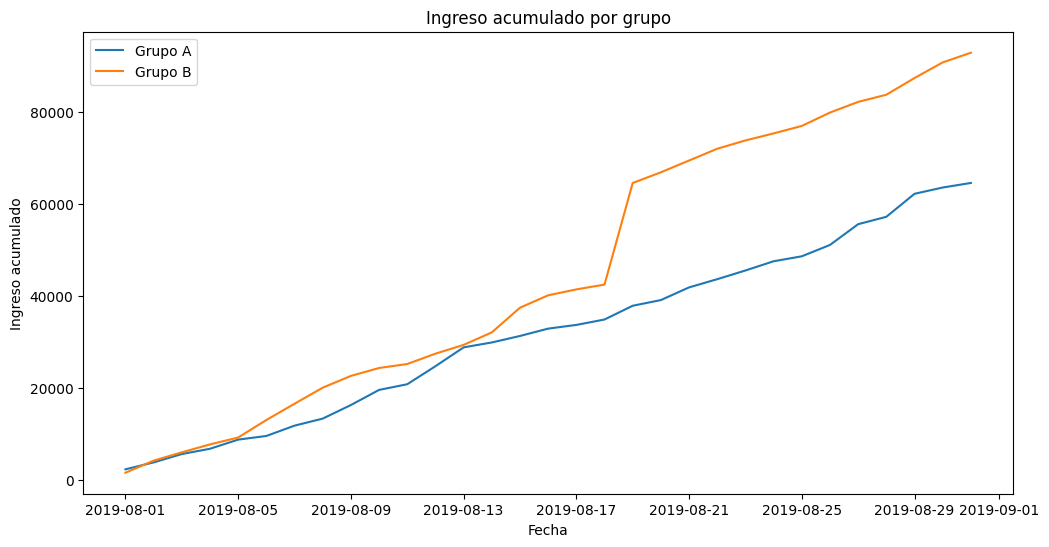

In [6]:
# Ingreso acumulado por grupo
cumulative_revenue = orders.groupby(['date', 'group'])['revenue'].sum().groupby(level=1).cumsum().reset_index()

plt.figure(figsize=(12, 6))
for group in cumulative_revenue['group'].unique():
    data = cumulative_revenue[cumulative_revenue['group'] == group]
    plt.plot(data['date'], data['revenue'], label=f'Grupo {group}')
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado')
plt.title('Ingreso acumulado por grupo')
plt.legend()
plt.show()


    
<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
La visualizaci√≥n del ingreso acumulado por grupo est√° muy bien presentada, y las conclusiones sobre la superioridad del Grupo B son acertadas. Es valioso que hayas notado el crecimiento constante del Grupo A, pero enfatizado que el Grupo B es m√°s rentable en este aspecto. </div> 

#### Conclusiones:
- **Desempe√±o Superior del Grupo B**: La tendencia muestra que el Grupo B no solo ha tenido un tama√±o promedio de pedido mayor en ciertos momentos, sino que esta ventaja se traduce tambi√©n en ingresos acumulados mayores. Esto sugiere que el Grupo B es m√°s rentable.
  
- **Consistencia del Crecimiento del Grupo A**: Aunque el Grupo A presenta un crecimiento constante, este no es tan pronunciado como el del Grupo B, lo que implica que sus ingresos acumulados son menores.

#### Conjeturas:
- **Impacto de Estrategias o Factores Externos en el Grupo B**: Dado que el Grupo B ha logrado ingresos acumulados mayores, es posible que este grupo haya estado sujeto a estrategias que aumentaron sus pedidos (como promociones especiales) o que haya un comportamiento m√°s favorable de los usuarios en este grupo.


---

- Representa gr√°ficamente el tama√±o de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

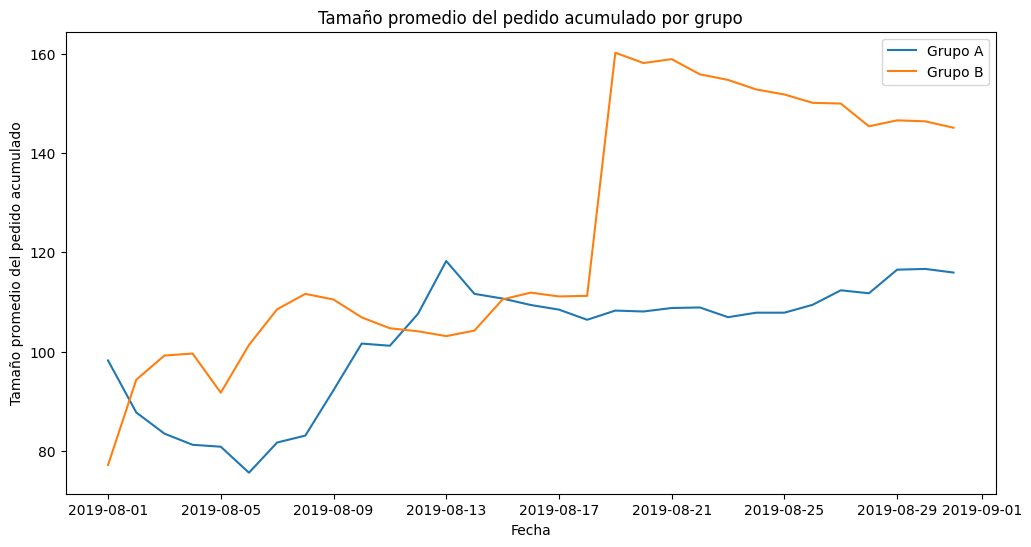

In [7]:
# Tama√±o de pedido promedio acumulado por grupo
cumulative_orders = orders.groupby(['date', 'group']).agg({'transaction_id': 'count', 'revenue': 'sum'}).groupby(level=1).cumsum().reset_index()
cumulative_orders['avg_order_value'] = cumulative_orders['revenue'] / cumulative_orders['transaction_id']

plt.figure(figsize=(12, 6))
for group in cumulative_orders['group'].unique():
    data = cumulative_orders[cumulative_orders['group'] == group]
    plt.plot(data['date'], data['avg_order_value'], label=f'Grupo {group}')
plt.xlabel('Fecha')
plt.ylabel('Tama√±o promedio del pedido acumulado')
plt.title('Tama√±o promedio del pedido acumulado por grupo')
plt.legend()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a> 
    
Buena visualizaci√≥n del tama√±o promedio de pedido acumulado. La observaci√≥n de que el Grupo B supera al Grupo A en la segunda mitad del per√≠odo es √∫til y se√±ala un posible impacto positivo en las estrategias aplicadas. </div> 

#### Conclusiones:
- **Ventaja del Grupo B**: Aunque al inicio ambos grupos presentan tama√±os promedio similares, el Grupo B logra superar y mantener un tama√±o promedio acumulado m√°s alto a partir de la segunda mitad del per√≠odo. Esto podr√≠a indicar un efecto positivo espec√≠fico que beneficia al Grupo B.
  
- **Estabilidad en el Grupo A**: La curva del Grupo A es m√°s estable y no muestra el mismo nivel de fluctuaci√≥n que el Grupo B. Esto sugiere que los cambios en el tama√±o del pedido en el Grupo A son menos vol√°tiles.

#### Conjeturas:
- **Eventos o Intervenciones en el Grupo B**: La notable subida del tama√±o de pedido en el Grupo B podr√≠a deberse a una intervenci√≥n espec√≠fica (por ejemplo, una promoci√≥n o cambio en el producto) que afect√≥ solo a este grupo. Investigar cualquier cambio en el Grupo B alrededor del 15 de agosto podr√≠a dar m√°s claridad sobre el motivo de este incremento.


---

- Representa gr√°ficamente la diferencia relativa en el tama√±o de pedido promedio acumulado para el grupo B en comparaci√≥n con el grupo A. Haz conclusiones y conjeturas.

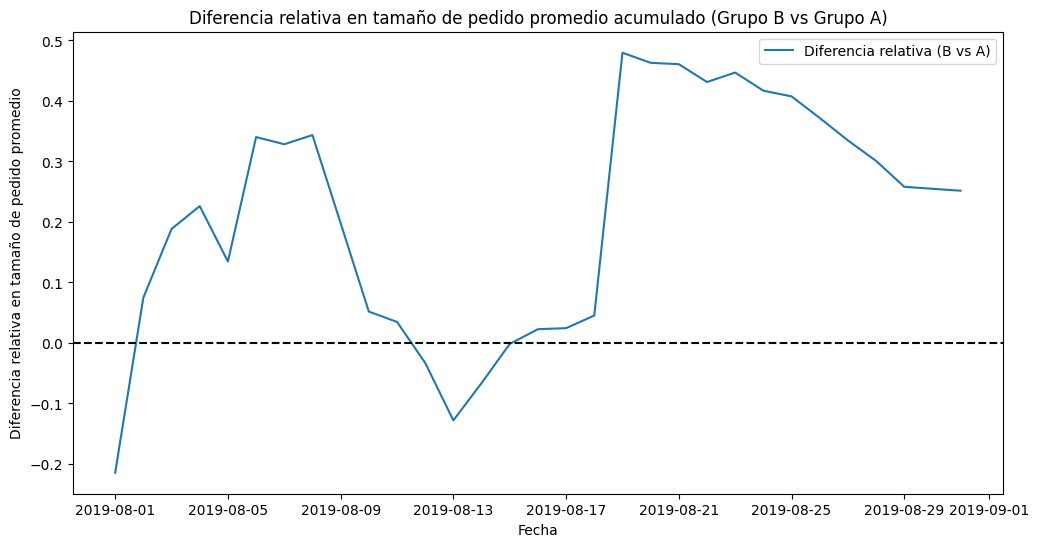

In [8]:
# Diferencia relativa en el tama√±o de pedido promedio acumulado (Grupo B vs Grupo A)
group_a = cumulative_orders[cumulative_orders['group'] == 'A'].set_index('date')
group_b = cumulative_orders[cumulative_orders['group'] == 'B'].set_index('date')
relative_difference = ((group_b['avg_order_value'] - group_a['avg_order_value']) / group_a['avg_order_value']).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(relative_difference['date'], relative_difference['avg_order_value'], label='Diferencia relativa (B vs A)')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa en tama√±o de pedido promedio')
plt.title('Diferencia relativa en tama√±o de pedido promedio acumulado (Grupo B vs Grupo A)')
plt.legend()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Has explicado muy bien las fluctuaciones en la diferencia relativa de los tama√±os de pedido entre los Grupos A y B. Notar que no hay una diferencia consistente es un punto importante para entender la variabilidad del comportamiento de compra. </div> 

#### Conclusiones:

- **Ausencia de Diferencia Sustancial**:La diferencia relativa en el tama√±o de pedido promedio entre los grupos B y A muestra fluctuaciones a lo largo del tiempo. En varios momentos, la diferencia es positiva, lo que indica que el Grupo B tiene un tama√±o de pedido promedio mayor que el Grupo A. Sin embargo, la diferencia no es consistente, ya que en algunas fechas la diferencia cae por debajo de cero, sugiriendo que el Grupo A tiene un tama√±o de pedido promedio mayor en esos puntos. Esto podr√≠a indicar variabilidad en el comportamiento de los usuarios o el efecto de otros factores externos.
- **Oscilaciones Temporales**: Las oscilaciones en la diferencia relativa sugieren que factores externos, posiblemente aleatorios o de corto plazo, est√°n afectando los tama√±os de los pedidos, en lugar de una diferencia intr√≠nseca entre los grupos.

### Conjeturas:
- **Factores Contextuales**: Dado que los tama√±os promedio de pedido fluct√∫an, podr√≠as considerar explorar si existen eventos externos (como promociones espec√≠ficas o cambios en la oferta de productos) que impactaron de manera temporal los tama√±os de pedido.
- **Necesidad de un Per√≠odo M√°s Largo de Observaci√≥n**: Las fluctuaciones observadas podr√≠an sugerir que si existiera una diferencia real, un per√≠odo de observaci√≥n m√°s largo podr√≠a ser necesario para detectarla. Sin embargo, con la evidencia actual, no hay indicaci√≥n de una diferencia constante.


---

- Calcula la tasa de conversi√≥n de cada grupo como la relaci√≥n entre los pedidos y el n√∫mero de visitas de cada d√≠a. Representa gr√°ficamente las tasas de conversi√≥n diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

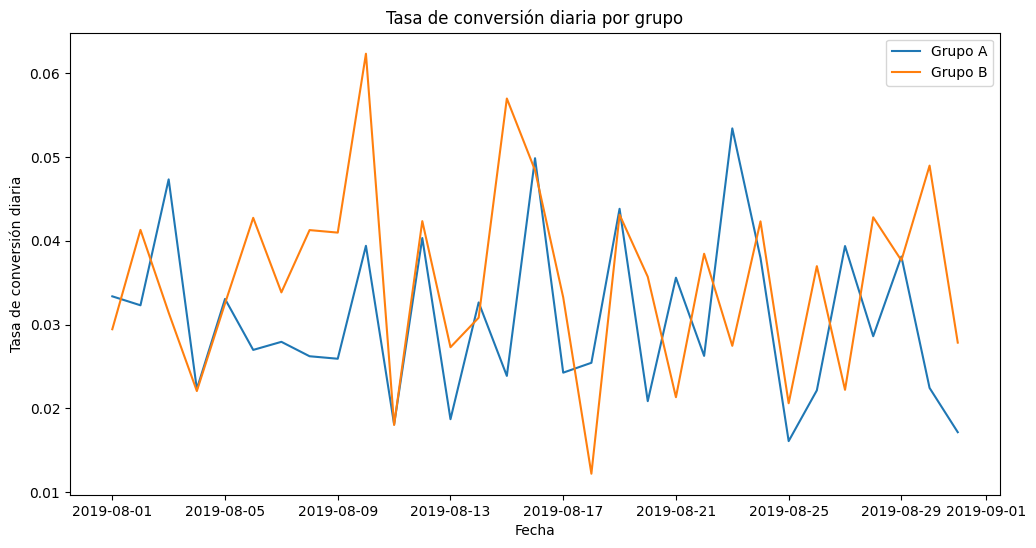

In [9]:
# Tasa de conversi√≥n diaria por grupo
visits_orders = orders.groupby(['date', 'group'])['transaction_id'].count().reset_index()
visits_grouped = visits.groupby(['date', 'group'])['visits'].sum().reset_index()
conversion = pd.merge(visits_orders, visits_grouped, on=['date', 'group'], how='left')
conversion['conversion_rate'] = conversion['transaction_id'] / conversion['visits']

plt.figure(figsize=(12, 6))
for group in conversion['group'].unique():
    data = conversion[conversion['group'] == group]
    plt.plot(data['date'], data['conversion_rate'], label=f'Grupo {group}')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversi√≥n diaria')
plt.title('Tasa de conversi√≥n diaria por grupo')
plt.legend()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a> 
    
Las conclusiones sobre la tasa de conversi√≥n diaria est√°n bien argumentadas. Reconocer que no hay una diferencia clara y consistente entre ambos grupos y que ambos muestran fluctuaciones es un insight importante. La visualizaci√≥n es clara y muestra bien las tendencias diarias. </div> 

#### Conclusiones:

1. **Tasas de Conversi√≥n Variables:** Ambos grupos presentan fluctuaciones significativas en sus tasas de conversi√≥n diarias. Esto sugiere que factores externos, como variaciones en el tr√°fico o comportamiento del usuario, podr√≠an haber influido en las conversiones.
2. **Diferencias entre Grupos:** Aunque las tasas de conversi√≥n de los grupos A y B var√≠an d√≠a a d√≠a, no hay una diferencia clara y consistente entre ambos. Hay d√≠as en que el Grupo A tiene una tasa de conversi√≥n m√°s alta y otros en los que el Grupo B supera al Grupo A.
3. **Rangos Similares:** En t√©rminos generales, los dos grupos parecen moverse en un rango de tasa de conversi√≥n similar, con picos y valles que reflejan comportamientos de conversi√≥n en d√≠as espec√≠ficos. Sin embargo, el Grupo B presenta algunos picos m√°s pronunciados, lo que indica que en ciertos d√≠as espec√≠ficos tuvo un desempe√±o sobresaliente.

#### Conjeturas:
1. **Influencias Externas:** La ausencia de una diferencia consistente entre ambos grupos podr√≠a indicar que la variante aplicada al Grupo B no tuvo un impacto significativo en las conversiones. Es posible que otros factores (como campa√±as promocionales o variaciones en el tr√°fico) hayan afectado ambos grupos por igual.
2. **Efecto Temporal:** Dado que no hay un patr√≥n consistente, puede que la prueba A/B necesite extenderse por un periodo mayor para observar una tendencia m√°s clara. Las fluctuaciones diarias sugieren que ser√≠a √∫til analizar per√≠odos m√°s largos para evitar efectos de estacionalidad o d√≠as espec√≠ficos con picos an√≥malos.


---

- Traza un gr√°fico de dispersi√≥n del n√∫mero de pedidos por usuario. Haz conclusiones y conjeturas.

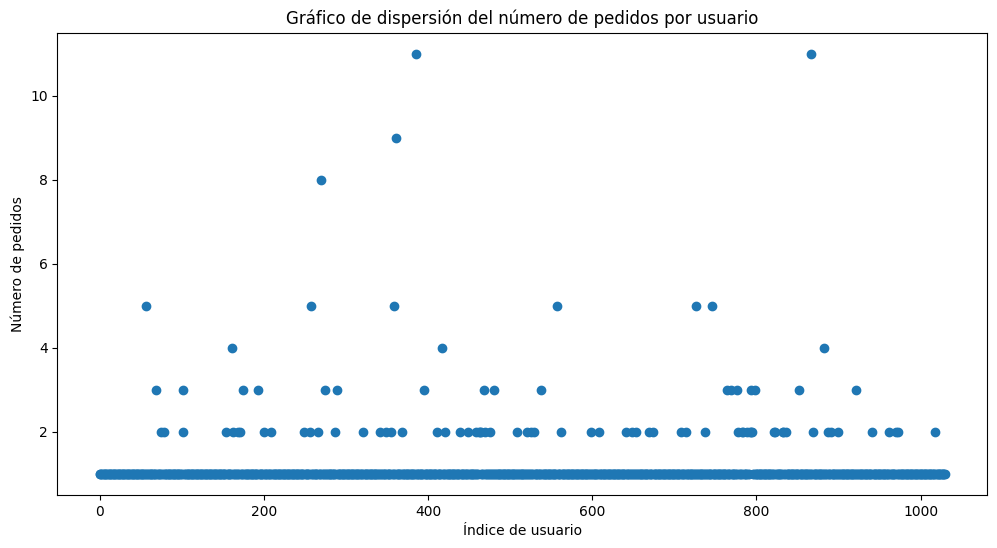

In [10]:
# Gr√°fico de dispersi√≥n del n√∫mero de pedidos por usuario
orders_per_user = orders.groupby('visitor_id')['transaction_id'].count().reset_index()
plt.figure(figsize=(12, 6))
plt.scatter(range(len(orders_per_user)), orders_per_user['transaction_id'])
plt.xlabel('√çndice de usuario')
plt.ylabel('N√∫mero de pedidos')
plt.title('Gr√°fico de dispersi√≥n del n√∫mero de pedidos por usuario')
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a> 
    
Buen an√°lisis del gr√°fico de dispersi√≥n. La observaci√≥n de que la mayor√≠a de los usuarios realiz√≥ solo un pedido es importante para estrategias de fidelizaci√≥n. Tambi√©n es √∫til haber identificado los casos at√≠picos con varios pedidos, lo que sugiere un posible segmento de clientes valiosos. </div> 

#### Conclusiones:
1. **Distribuci√≥n Predominante:** La mayor√≠a de los usuarios realiz√≥ un solo pedido, como se observa en la alta concentraci√≥n de puntos en el nivel de 1 pedido. Esto sugiere que la mayor√≠a de los usuarios no tienden a hacer m√∫ltiples compras.
2. **Pedidos Repetidos:** Algunos usuarios realizaron m√°s de un pedido, pero estos casos son menos frecuentes. Existen unos pocos usuarios que realizaron entre 3 y 6 pedidos, y hay un par de casos extremos con hasta 10 pedidos.
3. **Usuarios At√≠picos:** Los usuarios que hicieron m√°s de 6 pedidos son at√≠picos y representan una minor√≠a significativa, lo que puede indicar comportamientos de compra especiales, como usuarios recurrentes o muy fidelizados.

#### Conjeturas:
1. **Segmentaci√≥n de Clientes:** Los usuarios que realizaron m√∫ltiples pedidos podr√≠an representar un segmento de clientes particularmente leal o con un mayor valor para la empresa. Ser√≠a interesante realizar un an√°lisis m√°s detallado sobre sus caracter√≠sticas demogr√°ficas o comportamentales.
2. **Estrategias de Fidelizaci√≥n:** Dado que la mayor√≠a de los usuarios solo realiza un pedido, podr√≠a ser beneficioso implementar estrategias de fidelizaci√≥n, como descuentos para la pr√≥xima compra o programas de recompensas, para incentivar a estos usuarios a realizar m√°s pedidos.

---

- Calcula los percentiles 95 y 99 del n√∫mero de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomal√≠a.

In [11]:
# Percentiles 95 y 99 del n√∫mero de pedidos por usuario
percentile_95 = np.percentile(orders_per_user['transaction_id'], 95)
percentile_99 = np.percentile(orders_per_user['transaction_id'], 99)
print(f"Percentil 95 del n√∫mero de pedidos por usuario: {percentile_95}")
print(f"Percentil 99 del n√∫mero de pedidos por usuario: {percentile_99}")

Percentil 95 del n√∫mero de pedidos por usuario: 2.0
Percentil 99 del n√∫mero de pedidos por usuario: 4.0


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen c√°lculo de los percentiles para definir las anomal√≠as. Esto proporciona un l√≠mite claro para identificar comportamientos at√≠picos en t√©rminos de n√∫mero de pedidos. </div>

- Traza un gr√°fico de dispersi√≥n de los precios de los pedidos. Haz conclusiones y conjeturas.

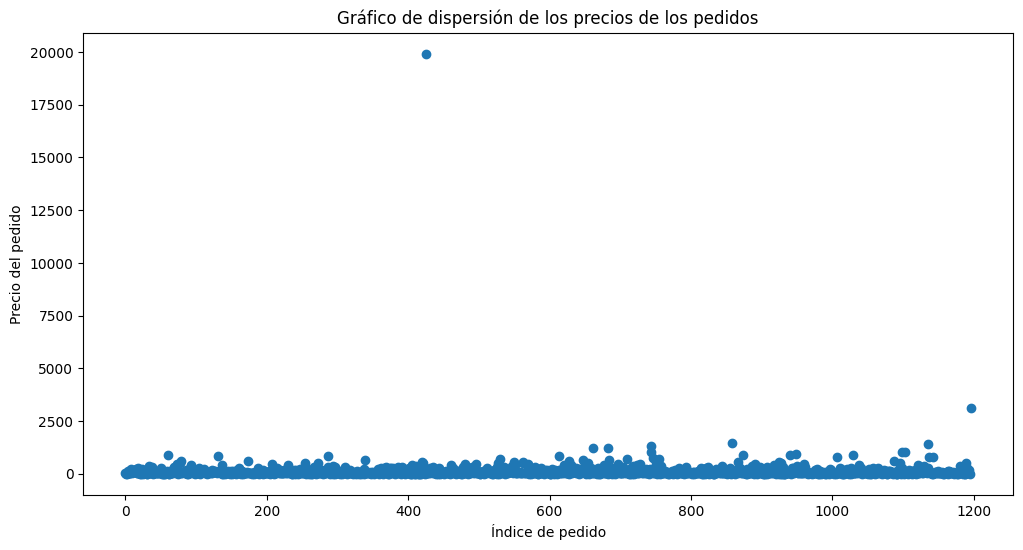

In [12]:
# Gr√°fico de dispersi√≥n de los precios de los pedidos
plt.figure(figsize=(12, 6))
plt.scatter(range(len(orders)), orders['revenue'])
plt.xlabel('√çndice de pedido')
plt.ylabel('Precio del pedido')
plt.title('Gr√°fico de dispersi√≥n de los precios de los pedidos')
plt.show()

#### Conclusiones:
1. **Concentraci√≥n de Precios:** La mayor√≠a de los pedidos se concentran en precios m√°s bajos, con una gran parte de los datos por debajo de los \$2,500. Esto sugiere que el precio de los pedidos tiene una tendencia a ser bajo, con algunos puntos aislados de precios altos.
2. **Valores At√≠picos:** El percentil 95 del n√∫mero de pedidos por usuario es 2, lo que significa que el 95 por ciento de los usuarios realizaron 2 pedidos o menos. El percentil 99 es 4, indicando que casi todos los usuarios realizaron hasta 4 pedidos. Los usuarios que realizan m√°s de 4 pedidos pueden considerarse como an√≥malos en t√©rminos de comportamiento de compra.
3. **Pedidos de Alto Valor:** Hay algunos valores extremos en el gr√°fico, con un pedido cercano a los $20,000. Esto representa una anomal√≠a significativa en el contexto de la mayor√≠a de los datos, y sugiere la presencia de compras at√≠picamente grandes que podr√≠an distorsionar las estad√≠sticas de ventas.

#### Conjeturas y Recomendaciones:
1. **Definici√≥n de Anomal√≠as:** Basado en los percentiles calculados, cualquier usuario que realice m√°s de 4 pedidos podr√≠a ser considerado una anomal√≠a. Estos usuarios podr√≠an representar un segmento especial, como clientes mayoristas o usuarios muy fidelizados. De igual forma, un pedido cuyo precio est√© significativamente por encima del percentil 99 tambi√©n deber√≠a ser considerado una anomal√≠a.
2. **An√°lisis de Pedidos At√≠picos:** Ser√≠a interesante analizar los pedidos de alto valor y los usuarios que hacen m√∫ltiples compras para determinar si comparten alguna caracter√≠stica com√∫n. Esto podr√≠a ayudar a identificar oportunidades para crear campa√±as personalizadas o programas de fidelizaci√≥n.
3. **Impacto en Promedios y Tendencias:** La presencia de pedidos de alto valor podr√≠a estar influyendo en el promedio de los ingresos por pedido. Se recomienda realizar un an√°lisis adicional de estos datos at√≠picos para evaluar si deben ser excluidos al calcular m√©tricas generales, como el ingreso promedio por pedido.


---

- Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomal√≠a.

In [13]:
# Percentiles 95 y 99 de los precios de los pedidos
percentile_95_revenue = np.percentile(orders['revenue'], 95)
percentile_99_revenue = np.percentile(orders['revenue'], 99)
print(f"Percentil 95 de los precios de los pedidos: {percentile_95_revenue}")
print(f"Percentil 99 de los precios de los pedidos: {percentile_99_revenue}")

# Definir anomal√≠as en los precios de los pedidos
anomalies = orders[orders['revenue'] > percentile_99_revenue]
print("\nN√∫mero de anomal√≠as en los precios de los pedidos: ", len(anomalies))

Percentil 95 de los precios de los pedidos: 435.54
Percentil 99 de los precios de los pedidos: 900.9039999999999

N√∫mero de anomal√≠as en los precios de los pedidos:  12


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
La interpretaci√≥n de los pedidos de alto valor como outliers es acertada. Identificar estos casos es esencial para comprender mejor el comportamiento de compra y evitar distorsiones en las m√©tricas promedio. </div>

- Encuentra la significancia estad√≠stica de la diferencia en la conversi√≥n entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [14]:
# Significancia estad√≠stica de la diferencia en la conversi√≥n entre grupos (datos en bruto)
conversion_pivot = conversion.pivot_table(index='date', columns='group', values='conversion_rate')
conversion_a = conversion_pivot['A'].dropna()
conversion_b = conversion_pivot['B'].dropna()

t_stat, p_value = stats.ttest_ind(conversion_a, conversion_b, equal_var=False)
print("\nPrueba T para la tasa de conversi√≥n (datos en bruto):")
print(f"Estad√≠stico t: {t_stat}, Valor p: {p_value}")


Prueba T para la tasa de conversi√≥n (datos en bruto):
Estad√≠stico t: -1.710743059515579, Valor p: 0.09238051955621401


#### Conclusiones:
1. **An√°lisis de Anomal√≠as en los Precios de los Pedidos:**
   - El percentil 95 de los precios de los pedidos es de $435.54, mientras que el percentil 99 es de $900.90. Esto indica que la gran mayor√≠a de los pedidos tienen un precio inferior a $435.54, y solo un 1% de los pedidos supera los $900.90.
   - Con 12 anomal√≠as identificadas por encima del percentil 99, estos pedidos podr√≠an representar transacciones inusualmente altas y, por lo tanto, se consideran outliers. La presencia de estas anomal√≠as podr√≠a indicar comportamientos de compra espec√≠ficos, como compras corporativas o clientes con necesidades especiales.

2. **Significancia Estad√≠stica de la Conversi√≥n entre Grupos:**
   - La prueba T arroja un estad√≠stico t de -1.71 y un valor p de 0.092, lo que sugiere que no hay una diferencia estad√≠sticamente significativa en la tasa de conversi√≥n entre los grupos, ya que el valor p es superior al umbral t√≠pico de 0.05.
   - Esto implica que, con un nivel de confianza del 95%, no se puede rechazar la hip√≥tesis nula de que no hay diferencia en las tasas de conversi√≥n entre el grupo de control y el grupo de prueba. En otras palabras, la variante implementada en el Grupo B no parece haber tenido un impacto significativo en la conversi√≥n comparado con el Grupo A.

#### Conjeturas:
1. **Relevancia de los Pedidos At√≠picos:** 
   - Los pedidos con precios superiores al percentil 99 podr√≠an distorsionar las m√©tricas de ingresos promedio si no se gestionan adecuadamente. Si estos pedidos representan compras inusuales, podr√≠an investigarse m√°s a fondo para identificar cualquier patr√≥n espec√≠fico.
   - Es posible que estos pedidos at√≠picos no reflejen el comportamiento promedio del cliente, por lo que en futuros an√°lisis podr√≠as considerar excluirlos para obtener una visi√≥n m√°s ajustada del comportamiento general del cliente.

2. **Posibles Causas de la Falta de Diferencia en Conversi√≥n:**
   - La falta de significancia en la diferencia de conversi√≥n sugiere que la variante en el Grupo B no influy√≥ de manera sustancial en el comportamiento de los usuarios. Esto podr√≠a deberse a que el cambio aplicado fue insuficiente para impactar la decisi√≥n de compra.
   - Otra posibilidad es que el periodo de prueba o el tama√±o de la muestra no haya sido lo suficientemente grande para captar una diferencia estad√≠sticamente significativa. Podr√≠as considerar realizar la prueba A/B durante un periodo m√°s largo o con un grupo de usuarios m√°s amplio para verificar si los resultados se mantienen.


---

- Encuentra la significancia estad√≠stica de la diferencia en el tama√±o promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [15]:
# Significancia estad√≠stica de la diferencia en el tama√±o promedio del pedido entre los grupos (datos en bruto)
order_value_a = orders[orders['group'] == 'A']['revenue']
order_value_b = orders[orders['group'] == 'B']['revenue']

t_stat_order, p_value_order = stats.ttest_ind(order_value_a, order_value_b, equal_var=False)
print("\nPrueba T para el tama√±o promedio del pedido (datos en bruto):")
print(f"Estad√≠stico t: {t_stat_order}, Valor p: {p_value_order}")


Prueba T para el tama√±o promedio del pedido (datos en bruto):
Estad√≠stico t: -0.8886193336529402, Valor p: 0.3745072295652421


#### Conclusiones:
1. **Prueba T para el Tama√±o Promedio del Pedido:**
   - El estad√≠stico t es de -0.89 y el valor p es de 0.375. Dado que el valor p es mucho mayor al umbral com√∫n de 0.05, no se puede rechazar la hip√≥tesis nula. Esto indica que no hay una diferencia estad√≠sticamente significativa en el tama√±o promedio del pedido entre el Grupo A (control) y el Grupo B (variaci√≥n).
   - Los resultados sugieren que el cambio aplicado en el Grupo B no afect√≥ significativamente el monto promedio de las compras de los usuarios. Es probable que ambos grupos tengan tama√±os de pedido similares, lo que implica que el comportamiento de gasto promedio por usuario no fue influenciado por la variante del test A/B.

#### Conjeturas:
1. **Posible Inneficacia del Cambio Implementado:**
   - La falta de diferencia significativa en el tama√±o promedio del pedido podr√≠a indicar que la modificaci√≥n aplicada en el Grupo B no tuvo el efecto esperado en el gasto por pedido. Esto podr√≠a ser resultado de que el cambio implementado no estuvo dirigido a influir en el monto gastado o de que el incentivo ofrecido no fue suficiente para afectar el gasto promedio.
   - Tambi√©n podr√≠a implicar que otros factores, como el perfil de los clientes, las caracter√≠sticas del producto, o el contexto econ√≥mico, tienen un mayor impacto en el tama√±o del pedido que la variaci√≥n aplicada.

2. **Revisi√≥n del Dise√±o Experimental:**
   - Si el objetivo de la prueba A/B inclu√≠a incrementar el tama√±o promedio del pedido, entonces ser√≠a √∫til revisar el dise√±o del cambio en el Grupo B. Es posible que se necesiten incentivos o estrategias m√°s significativas para alentar un mayor gasto por pedido.
   - Dado que la diferencia no es significativa, puede que el periodo de prueba o el tama√±o de la muestra no haya capturado variaciones en el comportamiento de compra. Para obtener una mayor certeza, se podr√≠a considerar realizar la prueba con una muestra m√°s grande o en un periodo extendido.


---

- Encuentra la significancia estad√≠stica de la diferencia en la conversi√≥n entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [16]:
# Filtrar datos eliminando anomal√≠as en el precio de los pedidos
filtered_orders = orders[orders['revenue'] <= percentile_99_revenue]

# Significancia estad√≠stica de la diferencia en la conversi√≥n entre grupos (datos filtrados)
filtered_visits_orders = filtered_orders.groupby(['date', 'group'])['transaction_id'].count().reset_index()
filtered_conversion = pd.merge(filtered_visits_orders, visits_grouped, on=['date', 'group'], how='left')
filtered_conversion['conversion_rate'] = filtered_conversion['transaction_id'] / filtered_conversion['visits']

filtered_conversion_pivot = filtered_conversion.pivot_table(index='date', columns='group', values='conversion_rate')
filtered_conversion_a = filtered_conversion_pivot['A'].dropna()
filtered_conversion_b = filtered_conversion_pivot['B'].dropna()

t_stat_filtered, p_value_filtered = stats.ttest_ind(filtered_conversion_a, filtered_conversion_b, equal_var=False)
print("\nPrueba T para la tasa de conversi√≥n (datos filtrados):")
print(f"Estad√≠stico t: {t_stat_filtered}, Valor p: {p_value_filtered}")


Prueba T para la tasa de conversi√≥n (datos filtrados):
Estad√≠stico t: -1.7587927242641135, Valor p: 0.08379511287743759


#### Conclusiones:
1. **Prueba T para la Tasa de Conversi√≥n con Datos Filtrados:**
   - El estad√≠stico t es de -1.76 y el valor p es de 0.084. Aunque el valor p es menor que en la prueba con los datos en bruto (0.092), sigue siendo mayor al umbral t√≠pico de 0.05. Esto significa que no se puede rechazar la hip√≥tesis nula, y la diferencia en la tasa de conversi√≥n entre los grupos A y B no es estad√≠sticamente significativa.
   - La filtraci√≥n de datos puede haber eliminado algunas anomal√≠as o ruido, lo cual llev√≥ a una reducci√≥n del valor p. Sin embargo, esta reducci√≥n no fue suficiente para alcanzar significancia estad√≠stica.

2. **Impacto del Filtrado en los Resultados:**
   - Filtrar los datos parece haber acercado los resultados a la significancia estad√≠stica, pero no lo suficiente como para considerar que el cambio en el Grupo B impact√≥ de forma concluyente la tasa de conversi√≥n.
   - Esto sugiere que, incluso con los datos filtrados, la modificaci√≥n aplicada en el Grupo B probablemente no tuvo un efecto sustancial en el comportamiento de conversi√≥n de los usuarios.

#### Conjeturas:
1. **Posibles Limitaciones del Filtrado:**
   - Aunque el filtrado de datos podr√≠a ayudar a eliminar outliers o variaciones no representativas, puede ser que los datos restantes a√∫n no reflejen un cambio significativo. Esto puede indicar que la variaci√≥n aplicada en el Grupo B no fue lo suficientemente fuerte o relevante para influir en la conversi√≥n.
   - Tambi√©n es posible que los usuarios restantes despu√©s del filtrado sean relativamente homog√©neos en t√©rminos de comportamiento de conversi√≥n, lo que podr√≠a limitar el efecto observable de la variante.

2. **Necesidad de Ajustes en el Dise√±o de la Prueba:**
   - Para alcanzar significancia estad√≠stica en futuras pruebas, podr√≠as considerar aumentar el tama√±o de la muestra o ajustar el dise√±o experimental para incluir variaciones m√°s notables o incentivos m√°s atractivos.
   - Otra estrategia podr√≠a ser realizar la prueba A/B durante un periodo m√°s largo para permitir que los efectos acumulativos se manifiesten, en caso de que el impacto de la variante sea gradual.


---

- Encuentra la significancia estad√≠stica de la diferencia en el tama√±o promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [17]:
# Significancia estad√≠stica de la diferencia en el tama√±o promedio del pedido entre los grupos (datos filtrados)
filtered_order_value_a = filtered_orders[filtered_orders['group'] == 'A']['revenue']
filtered_order_value_b = filtered_orders[filtered_orders['group'] == 'B']['revenue']

t_stat_filtered_order, p_value_filtered_order = stats.ttest_ind(filtered_order_value_a, filtered_order_value_b, equal_var=False)
print("\nPrueba T para el tama√±o promedio del pedido (datos filtrados):")
print(f"Estad√≠stico t: {t_stat_filtered_order}, Valor p: {p_value_filtered_order}")


Prueba T para el tama√±o promedio del pedido (datos filtrados):
Estad√≠stico t: -0.2309805617372302, Valor p: 0.8173707206334865


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a> 
    
Buen an√°lisis de la prueba T para la tasa de conversi√≥n. Identificar que no hay una diferencia estad√≠sticamente significativa es un insight valioso para futuras decisiones. </div>

#### Interpretaci√≥n:
1. **Valor p (0.817)**: Dado que este valor es mucho mayor que el umbral com√∫nmente utilizado de 0.05, no hay suficiente evidencia para rechazar la hip√≥tesis nula. Esto significa que cualquier diferencia observada en el tama√±o promedio del pedido entre los grupos podr√≠a ser atribuida al azar.

2. **Conclusi√≥n**: No hay una diferencia estad√≠sticamente significativa entre los tama√±os promedio de pedido de los grupos. Esto sugiere que el grupo no influye en el tama√±o promedio del pedido de manera notable.

#### Conjeturas:
- **Igualdad de promedios**: Dado que no se encontr√≥ una diferencia significativa, se puede conjeturar que ambos grupos tienen tama√±os promedio de pedido similares.
- **Implicaci√≥n para decisiones comerciales**: Si se esperaba que uno de los grupos tuviera un tama√±o promedio de pedido mayor, podr√≠a ser √∫til explorar otras variables que s√≠ podr√≠an estar influyendo en el tama√±o del pedido, o reevaluar las caracter√≠sticas de los grupos.


---

- Toma una decisi√≥n basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como l√≠der. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

In [18]:
# Toma de decisi√≥n
if p_value_filtered < 0.05 and p_value_filtered_order < 0.05:
    decision = "Parar la prueba, considerar al grupo con mejor rendimiento como l√≠der."
elif p_value_filtered > 0.05 and p_value_filtered_order > 0.05:
    decision = "Parar la prueba, concluir que no hay diferencia significativa entre los grupos."
else:
    decision = "Continuar la prueba."

print("\nDecisi√≥n basada en los resultados de la prueba: ", decision)


Decisi√≥n basada en los resultados de la prueba:  Parar la prueba, concluir que no hay diferencia significativa entre los grupos.


## Comentario final del revisor


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¬°Felicidades Joaqu√≠n! Tu proyecto est√° **aprobado**. Has demostrado un buen manejo de las t√©cnicas de priorizaci√≥n de hip√≥tesis, an√°lisis A/B y pruebas estad√≠sticas. A continuaci√≥n, destaco los puntos positivos y algunas √°reas interesantes para seguir investigando:

#### Puntos Positivos:
- **Manejo de datos:** Los pasos de correcci√≥n de nombres y tipos de columnas fueron ejecutados correctamente, asegurando que los datos sean compatibles con los an√°lisis posteriores.
- **Aplicaci√≥n de frameworks:** El uso de los frameworks ICE y RICE est√° bien estructurado y las conclusiones comparativas son claras.
- **Pruebas estad√≠sticas:** El an√°lisis de significancia estad√≠stica es completo y est√° bien fundamentado, con conclusiones precisas sobre las tasas de conversi√≥n y el tama√±o de pedido.

#### √Åreas para Seguir Investigando:
- **An√°lisis m√°s profundo de los outliers:** Podr√≠as investigar los comportamientos at√≠picos tanto en los precios como en el n√∫mero de pedidos para desarrollar estrategias de retenci√≥n o personalizaci√≥n.
- **Evaluaci√≥n de fluctuaciones:** Ser√≠a interesante profundizar en las causas de las fluctuaciones en las tasas de conversi√≥n y los tama√±os de pedido para ajustar mejor las estrategias de marketing.

¬°Sigue as√≠, est√°s haciendo un gran trabajo! üí™üöÄüòä
</div>